In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1

(np.float64(-0.5), np.float64(363.5), np.float64(308.5), np.float64(-0.5))

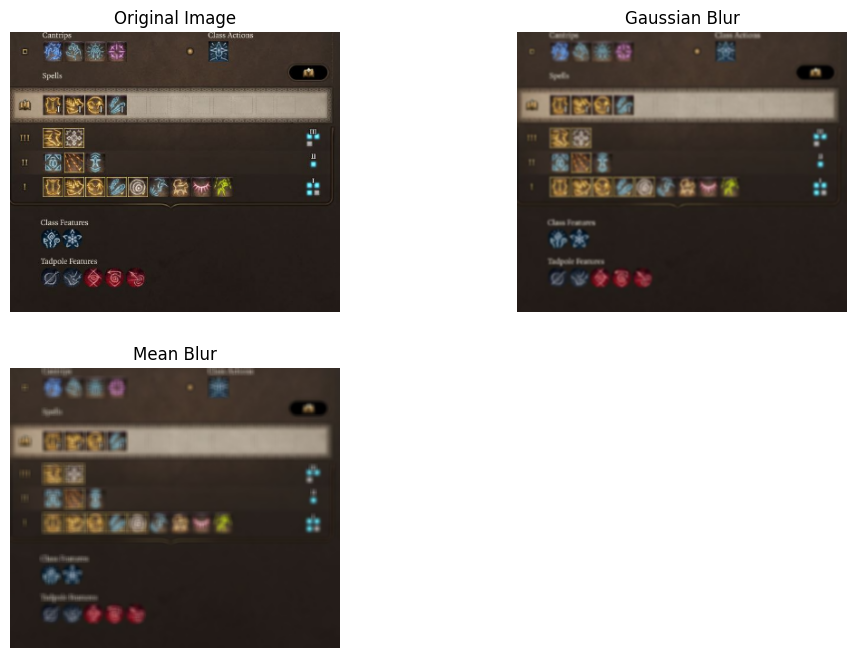

In [63]:

img = cv2.imread("images/image1.jpg")
img = cv2.resize(img, (0, 0), None, .65, .65)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



gaussianBlur = cv2.GaussianBlur(img,(5,5),-1)
meanBlur = cv2.blur(img,(5,5),-1)


#////////////Result Display///////////////

plt.figure(figsize=(12, 8))
    
plt.subplot(221)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(gaussianBlur)
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(223)
plt.imshow(meanBlur)
plt.title('Mean Blur')
plt.axis('off')


Average filter produces a more uniform and more intense blurring effect compared to Gaussian

## Task 2

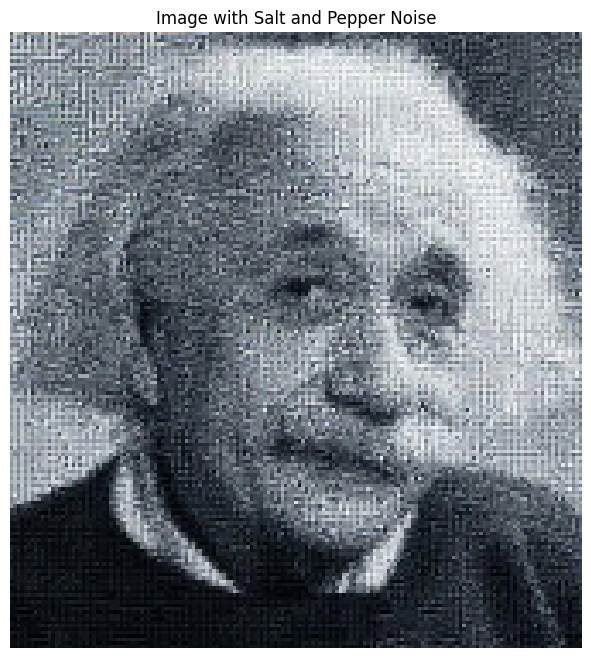

In [64]:
noisy_img = cv2.imread('images/einstein and pepper.png')
noisy_img = cv2.resize(noisy_img, (0,0), None, 0.45,0.45)
# noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)

# Display noisy image
plt.figure(figsize=(8, 8))
plt.imshow(noisy_img, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')
plt.show()


In [68]:
rank_13 = cv2.medianBlur(noisy_img,5)
rank_1 = cv2.erode(noisy_img,np.ones((5,5), np.uint8))
rank_25 = cv2.dilate(noisy_img,np.ones((5,5), np.uint8))

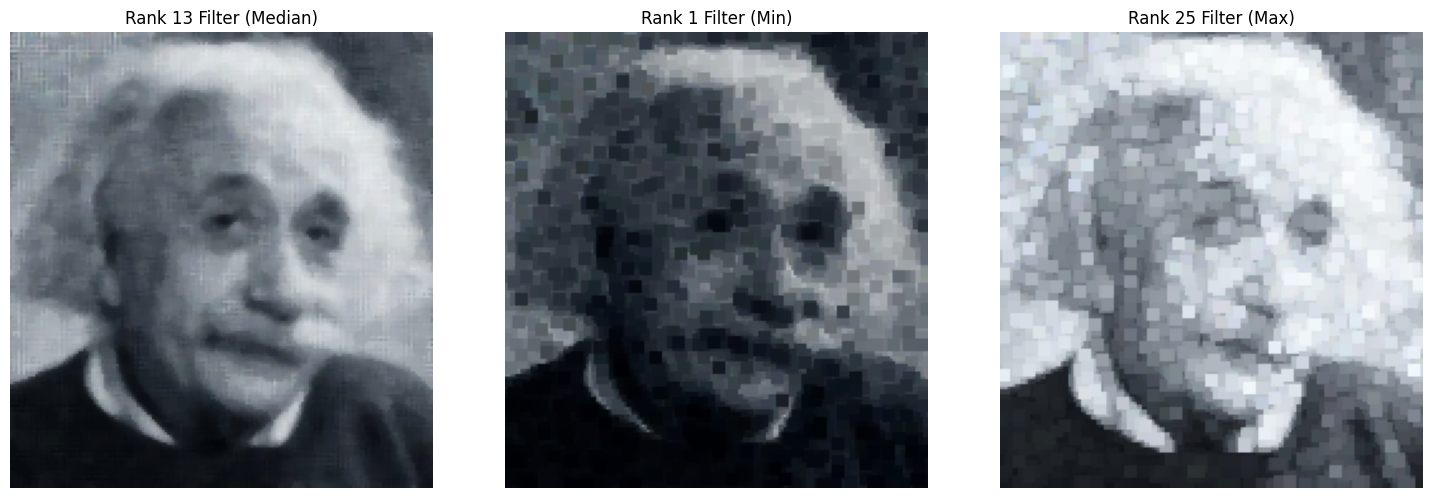

In [69]:
# Cell 6: Display filtered results
plt.figure(figsize=(15, 5))

# Rank 13 (Median) Filter
plt.subplot(131)
plt.imshow(rank_13, cmap='gray')
plt.title('Rank 13 Filter (Median)')
plt.axis('off')

# Rank 1 (Min) Filter
plt.subplot(132)
plt.imshow(rank_1, cmap='gray')
plt.title('Rank 1 Filter (Min)')
plt.axis('off')

# Rank 25 (Max) Filter
plt.subplot(133)
plt.imshow(rank_25, cmap='gray')
plt.title('Rank 25 Filter (Max)')
plt.axis('off')

plt.tight_layout()
plt.show()

Rank filters are alternatively known as percentile filters and also order statistic filters.

Rank 13 filter is equivalent to a median filter

Rank 1 filter selects the minimum value in the selected window making the resulting image darker and reducing white spots

Rank 25 filter selects the maximum value in the selected window making the resulting image brighter and reducing dark spots

## Task 3

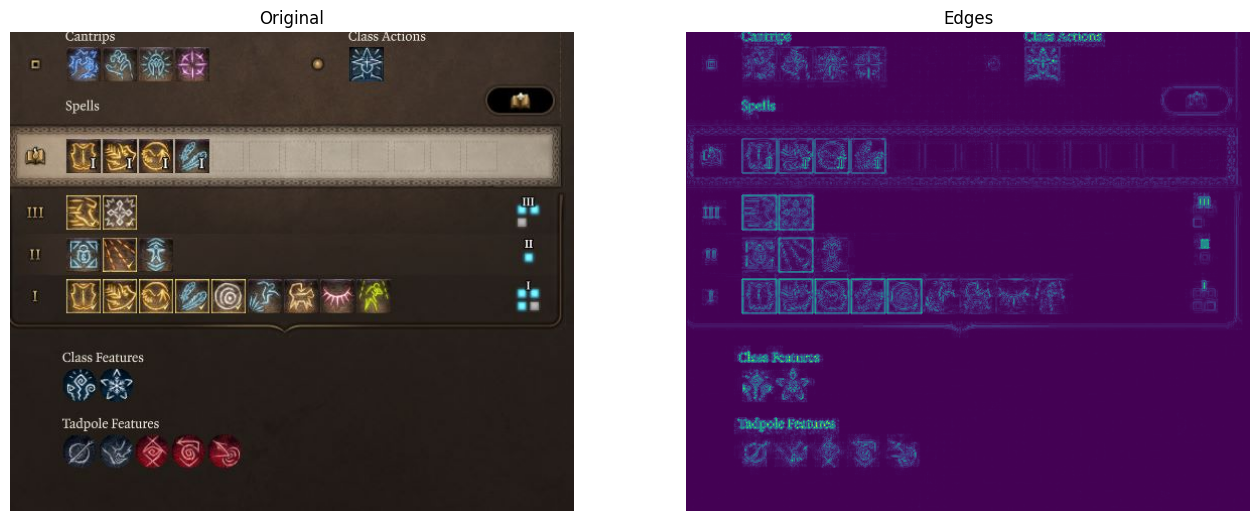

In [93]:
def mylaplacian(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype(np.float32) /255

    lap_x = np.zeros_like(gray)
    lap_y = np.zeros_like(gray)
    for i in range(1, gray.shape[0] - 1):
        for j in range(1, gray.shape[1] - 1):
            lap_x[i, j] = gray[i+1, j] + gray[i-1, j] - (2 * gray[i, j])
            lap_y[i, j] = gray[i, j+1] + gray[i, j-1] - (2 * gray[i, j])
        
    return np.sqrt(lap_x**2 + lap_y**2)
    
img3 = cv2.imread('images/image1.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
edges = mylaplacian(img3)

#///////////////Result Display/////////////////

plt.figure(figsize=(16,16))

plt.subplot(121)
plt.imshow(img3)
plt.title("Original")
plt.axis('off')

plt.subplot(122)
plt.imshow(edges)
plt.title("Edges")
plt.axis('off')

plt.show()